<a href="https://colab.research.google.com/github/shrud8817/Python-Codes-Apps/blob/master/HackerStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hacker statistics to calculate chances of winning a bet


You are walking up the Utility Building to OfficeX headquarters and you are playing a game with a friend.
You throw a dice 100 times. If it's 1 or 2 you'll go one step down. if it's 3,4 or 5 you will go one step up. If you throw a 6, you'll throw the dice again and walk up the resulting number of steps. You cannot go lower than step number 0. And also you admit that you are a bit clumsy and have a chance of 0.1% of falling down the stairs when you make a move. Falling down means that you have to start again from step 0.With all this in mind you bet with your friend that you will reach 60 steps high. What is the chance that you will win this bet?

How to solve?
1. calculate the chance analytically using equations.
2. simulate this process thousands of times and see in what fraction of the simulations that you will reach 60 steps. (hacker statistics) - we opt for this approach

# Dice simulation
The first thing we will need are random generators so we can simulate the die. We import numpy and inside numpy there is a random package. Inside that package we use the "rand" function. 

In [1]:
# Import numpy and set seed
import numpy as np
np.random.seed(123)

# Use randint() to simulate a dice
print(np.random.randint(1,7))

# Use randint() again
print(np.random.randint(1,7))

6
3


# Determine your next move - next step based on previous step
Assume you are at step 50. use if-elif-else to determine next move

In [2]:
# Starting step
step = 50

# Roll the dice
dice=np.random.randint(1,7)

# Finish the control construct
if dice <= 2 :
    step = step - 1
elif 3<=dice<6 :
    step = step +1
else:
    step = step + np.random.randint(1,7)

# Print out dice and step
print(dice)
print(step)

5
51



# How long can you go?
Random Walk Simulation using for loop - To calculate the location in the Utility Building after 100 dice throws. 

In [3]:


# Initialize random_walk
random_walk=[0]

for x in range(100) :
    # Set step: last element in random_walk
    step=random_walk[-1]

    # Roll the dice
    dice = np.random.randint(1,7)

    # Determine next step
    if dice <= 2:
        step = max(0,step - 1)   #use max to make sure step can't go below 0
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    # append next_step to random_walk
    random_walk.append(step)

# Print random_walk
print(random_walk)

[0, 1, 0, 1, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60, 64, 63]


# Visualize random walk

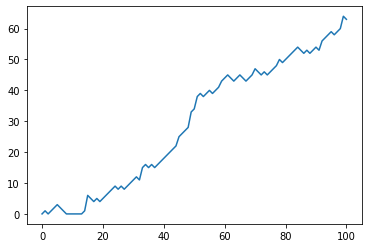

In [4]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()

# Simulate multiple walks
A single random walk is one thing, but that doesn't tell you if you have a good chance at winning the bet. To get an idea about how big your chances are of reaching 60 steps, you can repeatedly simulate the random walk and collect the results. 

In [5]:
# Initialize all_walks
all_walks = []

# Simulate random walk 10 times
for i in range(10) :

    # Code from before
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)

# Print all_walks
print(all_walks)

[[0, 0, 2, 1, 2, 4, 5, 6, 11, 10, 11, 12, 13, 14, 15, 14, 19, 20, 21, 22, 21, 20, 19, 18, 17, 18, 19, 20, 26, 25, 24, 23, 24, 25, 26, 25, 26, 27, 26, 31, 32, 31, 30, 29, 28, 29, 28, 27, 29, 30, 33, 34, 36, 37, 38, 39, 38, 37, 38, 39, 40, 41, 40, 41, 42, 43, 46, 47, 48, 47, 48, 47, 48, 49, 50, 54, 53, 52, 53, 54, 55, 54, 55, 54, 55, 57, 62, 61, 62, 63, 64, 65, 66, 67, 66, 67, 68, 69, 71, 73, 72], [0, 1, 2, 5, 4, 5, 4, 5, 6, 7, 6, 7, 6, 7, 8, 10, 9, 8, 9, 10, 9, 11, 12, 13, 14, 15, 16, 17, 16, 17, 18, 23, 24, 23, 22, 21, 20, 21, 22, 23, 28, 29, 28, 29, 30, 31, 32, 33, 34, 33, 32, 33, 32, 38, 37, 38, 37, 38, 37, 38, 42, 46, 48, 50, 49, 50, 52, 51, 57, 58, 60, 61, 60, 61, 62, 63, 62, 63, 64, 65, 67, 66, 65, 66, 72, 77, 76, 75, 79, 80, 81, 82, 84, 83, 84, 83, 84, 83, 82, 88, 87], [0, 1, 2, 3, 4, 5, 6, 7, 8, 7, 8, 7, 6, 7, 6, 7, 6, 7, 8, 12, 13, 12, 18, 17, 16, 17, 16, 15, 16, 15, 19, 18, 19, 18, 19, 18, 19, 21, 20, 19, 18, 19, 18, 23, 24, 25, 24, 23, 24, 23, 24, 23, 28, 29, 28, 27, 26, 25, 

# Visualize all walks
all_walks is a list of lists: every sub-list represents a single random walk. If we convert this list of lists to a Numpy array, we can start making interesting plots

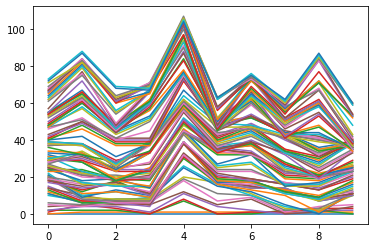

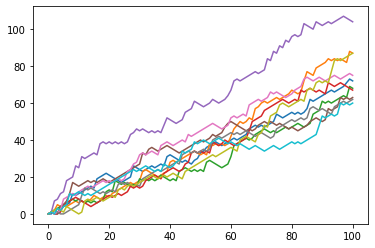

In [6]:
# Convert all_walks to Numpy array: np_aw
np_aw=np.array(all_walks)

# Plot np_aw and show
plt.plot(np_aw)
plt.show()
# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t=np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

# Implement clumsiness
You're a bit clumsy and you have a 0.1% chance of falling down. That calls for another random number generation. Basically, you can generate a random float between 0 and 1. If this value is less than or equal to 0.001, you should reset step to 0.

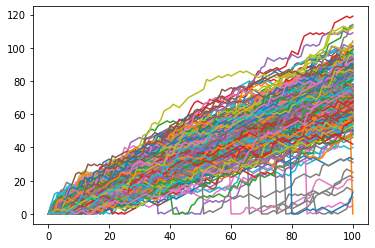

In [7]:
# Simulate random walk 250 times
all_walks = []
for i in range(250) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand()<=0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show() 

Look at the plot. In some of the 250 simulations you're indeed taking a deep dive down

# Plot distribution

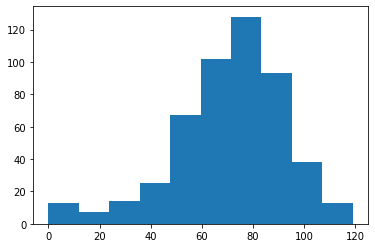

In [8]:
# numpy and matplotlib imported, seed set

# Simulate random walk 500 times
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

What do you think your chances are?

# Caculate the odds
The histogram  was created from a Numpy array ends, that contains 500 integers. Each integer represents the end point of a random walk. To calculate the chance that this end point is greater than or equal to 60, you can count the number of integers in ends that are greater than or equal to 60 and divide that number by 500, the total number of simulations.

In [10]:
count = sum(i >= 60 for i in ends)
chance = (count/500)* 100
print(count,chance)

374 74.8


**Seems like you have a pretty high chance of winning the bet!**